In [3]:
import tensorflow as tf
from tensorflow import keras

'2.1.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [15]:
y_val, y_train = y_train_full[:5000], y_train_full[5000:] 

In [18]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.7005 - accuracy: 0.7713 - val_loss: 0.4886 - val_accuracy: 0.8362
Epoch 2/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4814 - accuracy: 0.8326 - val_loss: 0.4496 - val_accuracy: 0.8470
Epoch 3/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4377 - accuracy: 0.8459 - val_loss: 0.4425 - val_accuracy: 0.8500
Epoch 4/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4121 - accuracy: 0.8552 - val_loss: 0.3960 - val_accuracy: 0.8628
Epoch 5/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3919 - accuracy: 0.8620 - val_loss: 0.3831 - val_accuracy: 0.8702
Epoch 6/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3751 - accuracy: 0.8682 - val_loss: 0.4039 - val_accuracy: 0.8578
Epoch 7/30
55000/55000 [==============================] -

In [23]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

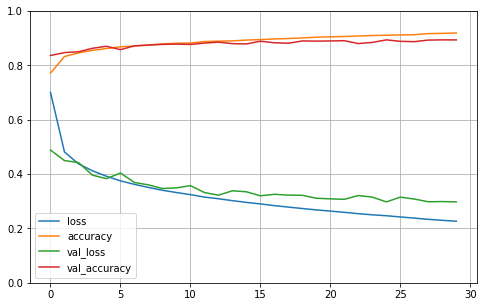

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [35]:
history2 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2241 - accuracy: 0.9202 - val_loss: 0.2992 - val_accuracy: 0.8918
Epoch 2/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2202 - accuracy: 0.9211 - val_loss: 0.3008 - val_accuracy: 0.8940
Epoch 3/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.2166 - accuracy: 0.9224 - val_loss: 0.3025 - val_accuracy: 0.8912
Epoch 4/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2132 - accuracy: 0.9236 - val_loss: 0.3020 - val_accuracy: 0.8910
Epoch 5/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2095 - accuracy: 0.9243 - val_loss: 0.3291 - val_accuracy: 0.8782
Epoch 6/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2068 - accuracy: 0.9253 - val_loss: 0.3099 - val_accuracy: 0.8880
Epoch 7/30
55000/55000 [==============================] -

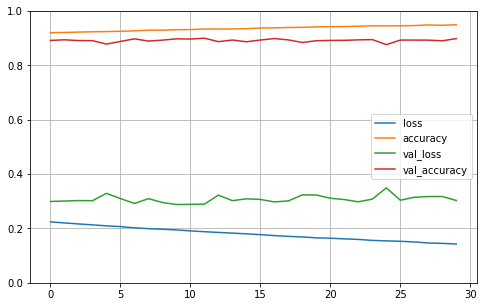

In [36]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [37]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 73.2627 - accuracy: 0.8560


[73.26265138327963, 0.856]

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [42]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')